In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpmd_api as io

In [2]:
series = io.Series("diags/openPMD/monitor.h5", io.Access.read_only)

In [3]:
iterations = list(series.iterations)

In [4]:
len(iterations)

50

In [5]:
# OK, 10 iterations for 10 turns in simulation

In [6]:
print(iterations)

[1, 27, 53, 79, 105, 131, 157, 183, 209, 235, 261, 287, 313, 339, 365, 391, 417, 443, 469, 495, 521, 547, 573, 599, 625, 651, 677, 703, 729, 755, 781, 807, 833, 859, 885, 911, 937, 963, 989, 1015, 1041, 1067, 1093, 1119, 1145, 1171, 1197, 1223, 1249, 1275]


In [7]:
# what are these numbers?
# there are five elements in the beamline, each had nslice=25
# 1 after monitor, + 5*25+1 + 5*25+1 + 5*25+1?

In [8]:
itest = []
i = 0
for r in range(10):
    i = i + 1
    itest.append(i)
    for s in range(5):
        i = i + 25
print(itest)

[1, 127, 253, 379, 505, 631, 757, 883, 1009, 1135]


In [9]:
# OK now I know what they are

In [10]:
# Look at reduced beam quantties for each iteration

In [11]:
std_x = []
std_y = []
for i in iterations:
    std_x.append(series.iterations[i].particles['beam'].get_attribute('sig_x'))
    std_y.append(series.iterations[i].particles['beam'].get_attribute('sig_y'))

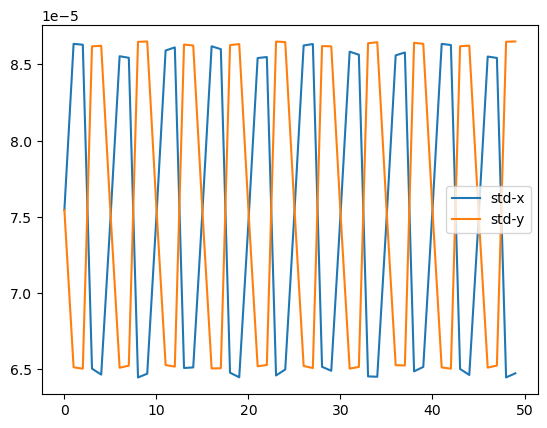

In [13]:
plt.plot(std_x, label='std-x')
plt.plot(std_y, label='std-y')
plt.legend(loc='best')

In [12]:
#series.close()

In [15]:
# How many particles are in the diagnostics?
beams_df = []
for i in iterations:
    beams_df.append(series.iterations[i].particles['beam'].to_df())

In [17]:
beams_df[0]['position_x'].shape

(10000,)

In [18]:
emit_x = []
emit_y = []
beta_x = []
beta_y = []
for i in iterations:
    emit_x.append(series.iterations[i].particles['beam'].get_attribute('emittance_x'))
    beta_x.append(series.iterations[i].particles['beam'].get_attribute('beta_x'))
    emit_y.append(series.iterations[i].particles['beam'].get_attribute('emittance_y'))
    beta_y.append(series.iterations[i].particles['beam'].get_attribute('beta_y'))    

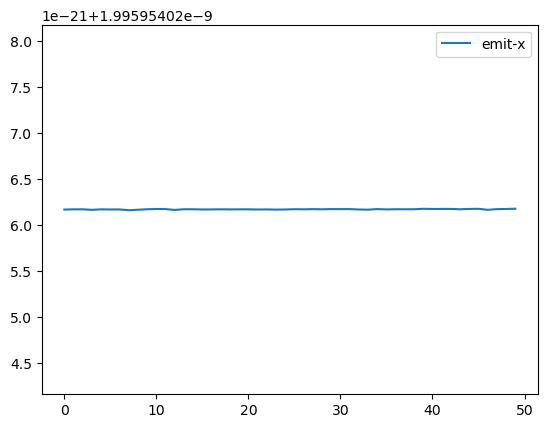

In [20]:
plt.plot(emit_x, label='emit-x')
plt.legend(loc='best')

In [21]:
emit_x

[1.9959540205161694e-09,
 1.9959540205161715e-09,
 1.995954020516172e-09,
 1.995954020516166e-09,
 1.9959540205161715e-09,
 1.9959540205161703e-09,
 1.9959540205161707e-09,
 1.995954020516162e-09,
 1.9959540205161674e-09,
 1.9959540205161727e-09,
 1.9959540205161752e-09,
 1.9959540205161744e-09,
 1.9959540205161653e-09,
 1.9959540205161727e-09,
 1.9959540205161723e-09,
 1.9959540205161703e-09,
 1.9959540205161707e-09,
 1.995954020516172e-09,
 1.995954020516171e-09,
 1.9959540205161715e-09,
 1.9959540205161715e-09,
 1.99595402051617e-09,
 1.9959540205161707e-09,
 1.9959540205161686e-09,
 1.99595402051617e-09,
 1.995954020516173e-09,
 1.995954020516172e-09,
 1.9959540205161736e-09,
 1.9959540205161723e-09,
 1.9959540205161744e-09,
 1.995954020516174e-09,
 1.9959540205161744e-09,
 1.99595402051617e-09,
 1.995954020516168e-09,
 1.9959540205161744e-09,
 1.995954020516171e-09,
 1.9959540205161727e-09,
 1.9959540205161727e-09,
 1.9959540205161727e-09,
 1.9959540205161773e-09,
 1.9959540205161

In [1]:
# is the size of the data file sensible?
turns = 10
saves_per_turn = 6
particles = 10000
coords = 10 # 6 coords + 1d + 3refpart
bytes_per_item = 8
size = turns * saves_per_turn * particles * coords * bytes_per_item
print(size, 'bytes')

48000000 bytes


In [ ]:
# Real size
# -rw-r--r-- 1 egstern egstern 60763128 Apr  9 12:48 monitor.h5